In [1]:
# %load_ext google.cloud.bigquery

In [1]:
import matplotlib.pyplot as plot

In [2]:
import pydata_google_auth

In [3]:
import pandas as pd

In [14]:
credentials = pydata_google_auth.get_user_credentials(
    ['https://www.googleapis.com/auth/bigquery'],
)
project_id = 'apprenticeship-299321'
threeColorsArray = ['#FFC6FF', '#CAFFBF', '#FFD6A5']
rainbowArray = ['#FFADAD', '#FFD6A5', '#FDFFB6', '#CAFFBF', '#9BF6FF', '#A0C4FF', '#BDB2FF', '#FFC6FF']
singleColorArray = ["#BDB2FF"]

In [29]:
def runQuery(queryName):
    query = pd.read_gbq(queryName, project_id=project_id, dialect='standard', credentials=credentials)
    print(query)
    return query

  deviceCategory  deviceCategoryCount
0         tablet                 5216
1        desktop                 5263
2         mobile                 5368


<AxesSubplot:ylabel='deviceCategoryCount'>

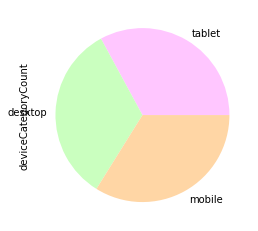

In [34]:
query2 = """
    SELECT deviceCategory, COUNT(*) AS deviceCategoryCount
    FROM `apprenticeship-299321.sample_data.datatable`
    GROUP BY deviceCategory
    ORDER BY deviceCategoryCount ASC
"""
runQuery(query2).plot.pie(x='deviceCategory', y='deviceCategoryCount', colors=threeColorsArray, legend=False, labels=["tablet", "desktop", "mobile"])

     channelGrouping  channelGroupingCount
0         Newsletter                   503
1   Partner referral                   503
2       Email alerts                   516
3        Retargeting                  1085
4            Display                  1216
5              Email                  1475
6            (Other)                  1491
7             Social                  1501
8        Aggregators                  1501
9        Paid Search                  1511
10            Direct                  1515
11          Referral                  1515
12    Organic Search                  1515


<AxesSubplot:xlabel='channelGrouping'>

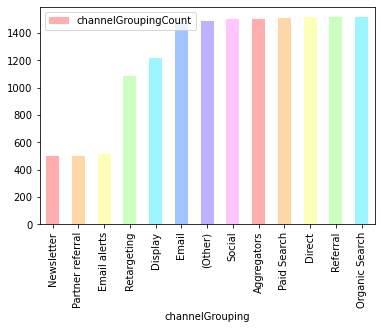

In [36]:
query3 = """
    SELECT channelGrouping, COUNT(*) AS channelGroupingCount
    FROM `apprenticeship-299321.sample_data.datatable`
    GROUP BY channelGrouping
    ORDER BY channelGroupingCount ASC
"""
runQuery(query3).plot.bar(x='channelGrouping', y='channelGroupingCount', color=rainbowArray)

         date  numberOf
0    20170101        30
1    20170102        30
2    20170103        30
3    20170104        30
4    20170105        30
..        ...       ...
500  20180516        33
501  20180517        33
502  20180518        34
503  20180519        34
504  20180520        34

[505 rows x 2 columns]


<AxesSubplot:xlabel='date'>

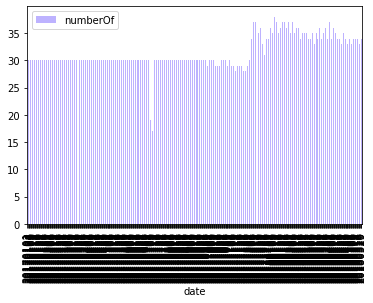

In [17]:
# um, what is this supposed to tell us?
# TODO: revisit this
query4 = """
    SELECT date, COUNT(*) as numberOf
    FROM `apprenticeship-299321.sample_data.datatable`
    GROUP BY date
    ORDER BY date ASC
"""
runQuery(query4).plot.bar(x='date', y='numberOf', color=singleColorArray)

  deviceCategory  averageConversionsPerDeviceCategory
0         tablet                                 20.4
1         mobile                                 38.6
2        desktop                                 53.7


<AxesSubplot:ylabel='averageConversionsPerDeviceCategory'>

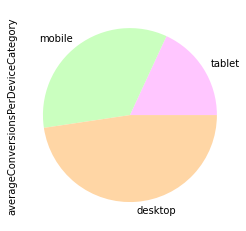

In [33]:
# this is rounded to 1 decimal place, while other data is rounded to 4 -
# this is because ideally I'd have used significant figures
query5 = """
    SELECT deviceCategory, ROUND(AVG(conversions), 1) as averageConversionsPerDeviceCategory
    FROM `apprenticeship-299321.sample_data.datatable`
    GROUP BY deviceCategory
    ORDER BY averageConversionsPerDeviceCategory
"""
runQuery(query5).plot.pie(y='averageConversionsPerDeviceCategory', colors=threeColorsArray, legend=False, labels=["tablet", "mobile", "desktop"])

  deviceCategory  conversionRatePerDeviceCategory
0         mobile                           0.0261
1        desktop                           0.0430
2         tablet                           0.0551


<AxesSubplot:ylabel='conversionRatePerDeviceCategory'>

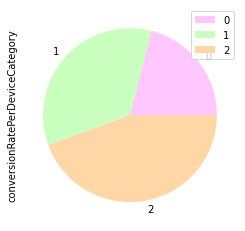

In [19]:
query6 = """
    SELECT deviceCategory, ROUND((AVG(conversions))/(AVG(sessions)), 4) as conversionRatePerDeviceCategory
    FROM apprenticeship-299321.sample_data.datatable
    GROUP BY deviceCategory
    ORDER BY conversionRatePerDeviceCategory
"""
runQuery(query6).plot.pie(x='deviceCategory', y='conversionRatePerDeviceCategory', normalize=True, colors=threeColorsArray)

In [ ]:
# TODO: remove backticks

     channelGrouping  conversionRatePerChannelGrouping
0             Social                            0.0287
1            (Other)                            0.0344
2         Newsletter                            0.0350
3        Paid Search                            0.0350
4             Direct                            0.0354
5              Email                            0.0357
6        Aggregators                            0.0358
7       Email alerts                            0.0358
8     Organic Search                            0.0368
9           Referral                            0.0370
10       Retargeting                            0.0387
11  Partner referral                            0.0399
12           Display                            0.0444


<AxesSubplot:xlabel='channelGrouping'>

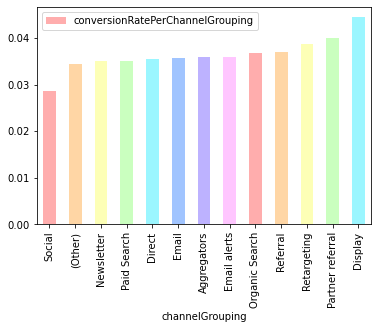

In [20]:
query7 = """
    SELECT channelGrouping, ROUND((AVG(conversions))/(AVG(sessions)), 4) as conversionRatePerChannelGrouping
    FROM apprenticeship-299321.sample_data.datatable
    GROUP BY channelGrouping
    ORDER BY conversionRatePerChannelGrouping
"""
runQuery(query7).plot.bar(x='channelGrouping', y='conversionRatePerChannelGrouping', color=rainbowArray)

         date  conversionRate
0    20170101          0.0313
1    20170102          0.0308
2    20170103          0.0372
3    20170104          0.0317
4    20170105          0.0400
..        ...             ...
500  20180516          0.0399
501  20180517          0.0345
502  20180518          0.0390
503  20180519          0.0342
504  20180520          0.0382

[505 rows x 2 columns]


<AxesSubplot:xlabel='date'>

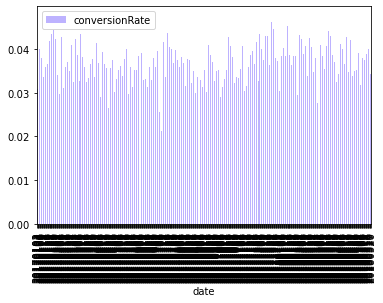

In [21]:
query8 = """
    SELECT date, ROUND((AVG(conversions))/(AVG(sessions)), 4) as conversionRate
    FROM `apprenticeship-299321.sample_data.datatable`
    GROUP BY date
    ORDER BY date ASC
"""
runQuery(query8).plot.bar(x='date', y='conversionRate', color=singleColorArray)
# TODO: revisit - date is an integer, so this doesn't show up properly as a line graph

         date  totalSessions
0    20170101          17367
1    20170102          27842
2    20170103          42792
3    20170104          42956
4    20170105          43019
..        ...            ...
500  20180516          32012
501  20180517          26716
502  20180518          22831
503  20180519          14260
504  20180520          17993

[505 rows x 2 columns]


<AxesSubplot:xlabel='date'>

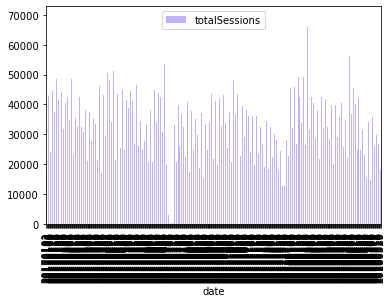

In [22]:
query9 = """
    SELECT date, SUM(sessions) as totalSessions
    FROM `apprenticeship-299321.sample_data.datatable`
    GROUP BY date
    ORDER BY date ASC
"""
runQuery(query9).plot.bar(x='date', y='totalSessions', color=singleColorArray)
# TODO: revisit - bar graphs treat the date axis in a more logical way, but really it should be a line graph

         date  totalConversions
0    20170101               544
1    20170102               857
2    20170103              1590
3    20170104              1361
4    20170105              1719
..        ...               ...
500  20180516              1278
501  20180517               922
502  20180518               891
503  20180519               488
504  20180520               688

[505 rows x 2 columns]


<AxesSubplot:xlabel='date'>

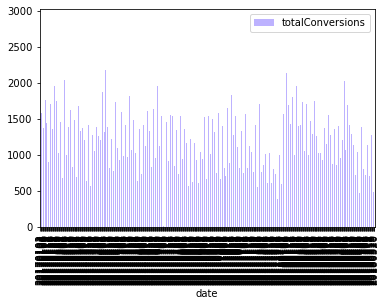

In [23]:
query10 = """
    SELECT date, SUM(conversions) as totalConversions
    FROM `apprenticeship-299321.sample_data.datatable`
    GROUP BY date
    ORDER BY date ASC
"""
runQuery(query10).plot.bar(x='date', y='totalConversions', color=singleColorArray)

  deviceCategory  sumChannelGrouping
0         tablet                5216
1        desktop                5263
2         mobile                5368


<AxesSubplot:ylabel='sumChannelGrouping'>

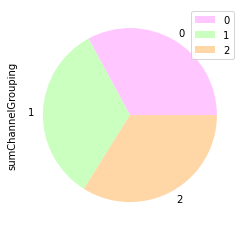

In [25]:
query10 = """
    SELECT deviceCategory, COUNT(channelGrouping) as sumChannelGrouping
    FROM `apprenticeship-299321.sample_data.datatable`
    GROUP BY deviceCategory
    ORDER BY sumChannelGrouping ASC
"""
runQuery(query10).plot.pie(x='deviceCategory', y='sumChannelGrouping', colors=threeColorsArray)

   conversionRateFor2017
0                 0.0359
   conversionRateFor2018
0                  0.037


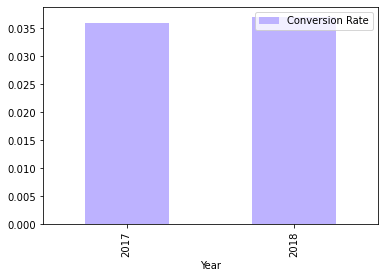

In [26]:
# conversion rates for each year
query11 = """
    SELECT ROUND((AVG(conversions))/(AVG(sessions)), 4) as conversionRateFor2017
    FROM `apprenticeship-299321.sample_data.datatable`
    WHERE date<20180000
"""
conversionRateFor2017 = runQuery(query11)

query12 = """
    SELECT ROUND((AVG(conversions))/(AVG(sessions)), 4) as conversionRateFor2018
    FROM `apprenticeship-299321.sample_data.datatable`
    WHERE date>20180000
"""
conversionRateFor2018 = runQuery(query12)

# TODO: change conversionRateFor2017 and conversionRateFor2018 variable types
# so that the code below works and you don't have to hardcode the data
# data = {"Year":[2017, 2018], "Conversion Rate":[conversionRateFor2017, conversionRateFor2018]};
# dataFrame= pd.DataFrame(data=data)
# dataFrame.plot.bar(x="Year", y="Conversion Rate")
# plot.show(block=True)

data = {"Year":[2017, 2018], "Conversion Rate":[0.0359, 0.0370]};
dataFrame= pd.DataFrame(data=data)
dataFrame.plot.bar(x="Year", y="Conversion Rate", color=singleColorArray)
plot.show(block=True)